Typical atomic data used in PHiX
===

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from raysect.optical import World
# from cherab.core import elements
from cherab.phix.plasma import import_plasma
plt.rcParams["font.size"] = 14
plt.rcParams["figure.dpi"] = 200

In [2]:
world = World()
plasma, eq = import_plasma(world)

loading plasma (data from: phix10)...


The photon emission models used in PHiX are listed as follows:

In [3]:
[i for i in plasma.models]

[<PlasmaModel - Bremsstrahlung>,
 <ExcitationLine: element=hydrogen, charge=0, transition=(3, 2)>,
 <ExcitationLine: element=hydrogen, charge=0, transition=(4, 2)>,
 <ExcitationLine: element=hydrogen, charge=0, transition=(5, 2)>,
 <ExcitationLine: element=hydrogen, charge=0, transition=(6, 2)>,
 <RecombinationLine: element=hydrogen, charge=0, transition=(3, 2)>,
 <RecombinationLine: element=hydrogen, charge=0, transition=(4, 2)>,
 <RecombinationLine: element=hydrogen, charge=0, transition=(5, 2)>,
 <RecombinationLine: element=hydrogen, charge=0, transition=(6, 2)>]

In [4]:
species = [i for i in plasma.composition]
print(species)

[<Species: element=hydrogen, charge=0>, <Species: element=hydrogen, charge=1>]


Plotting Photon Emissivity Coefficient (PEC) vs $T_e$ for hydrogen transitions
----

plasma emissivity driven by electron transition from j to i $\epsilon_{j\rightarrow i}$ [$\text{W/m}^3$] represent as follows:

\begin{align}
\epsilon_{j\rightarrow i} = \sum_\rho \text{PEC}_{\rho, j\rightarrow i}^\text{(exc)}(n_e, T_e)n_e n_Z(\rho) + \sum_\nu \text{PEC}_{\nu, j\rightarrow i}^\text{(rec)}(n_e, T_e)n_e n_{Z+1}(\nu)
\end{align}

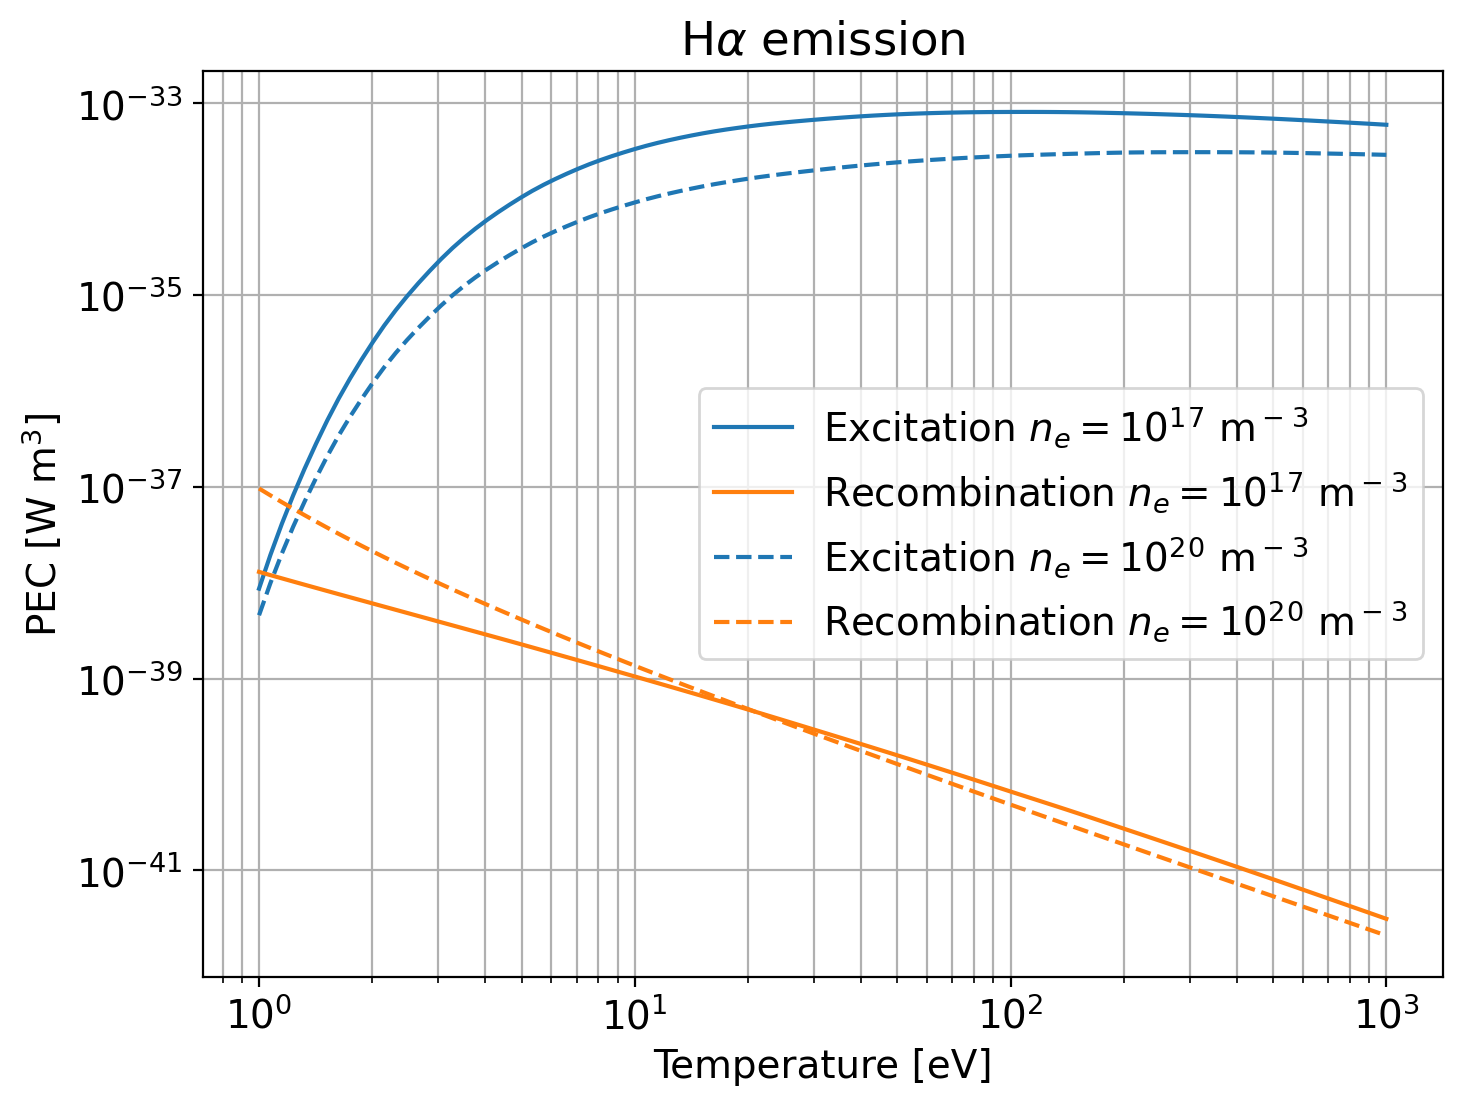

In [5]:
temp = [10**x for x in np.linspace(np.log10(1), np.log10(1000), num=100)]
dens = [17, 20]  # 10^x [m^-3]

pec_exc = plasma.atomic_data.impact_excitation_pec(species[0].element, species[0].charge, (3, 2))
pec_rem = plasma.atomic_data.recombination_pec(species[0].element, species[0].charge, (3, 2))

fig, ax = plt.subplots(figsize=(8, 6))
ax.loglog(temp, [pec_exc(10**dens[0], te) for te in temp], "C0")
ax.loglog(temp, [pec_rem(10**dens[0], te) for te in temp], "C1")
ax.loglog(temp, [pec_exc(10**dens[1], te) for te in temp], "C0", linestyle = "--")
ax.loglog(temp, [pec_rem(10**dens[1], te) for te in temp], "C1", linestyle = "--")

dens_index1 = str(dens[0])
dens_index2 = str(dens[1])
ax.legend(["Excitation $n_e=10^{}$$^{}$ m$^{}$$^{}$".format(dens_index1[0], dens_index1[1], "-", "3"),
           "Recombination $n_e=10^{}$$^{}$ m$^{}$$^{}$".format(dens_index1[0], dens_index1[1], "-", "3"),
           "Excitation $n_e=10^{}$$^{}$ m$^{}$$^{}$".format(dens_index2[0], dens_index2[1], "-", "3"),
           "Recombination $n_e=10^{}$$^{}$ m$^{}$$^{}$".format(dens_index2[0], dens_index2[1], "-", "3")]
         );
    
ax.set_title("H$\\alpha$ emission");
ax.set_xlabel("Temperature [eV]");
ax.set_ylabel("PEC [W m$^3$]");
plt.grid(which="both")

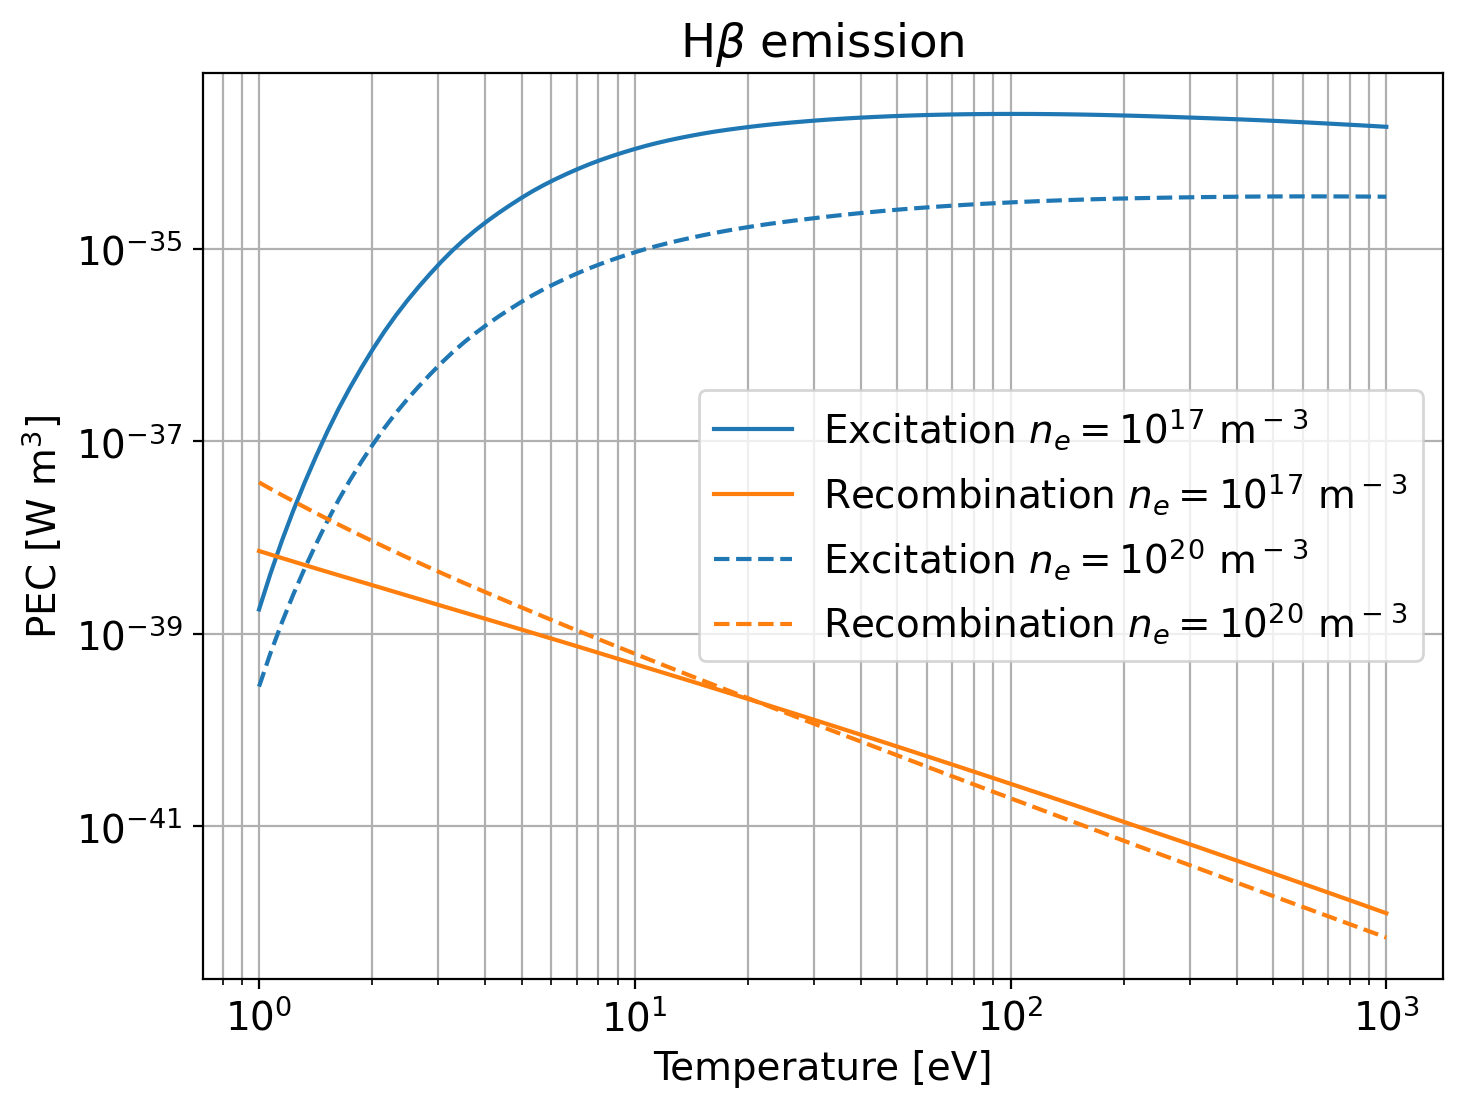

In [6]:
pec_exc = plasma.atomic_data.impact_excitation_pec(species[0].element, species[0].charge, (4, 2))
pec_rem = plasma.atomic_data.recombination_pec(species[0].element, species[0].charge, (4, 2))

fig, ax = plt.subplots(figsize=(8, 6))
ax.loglog(temp, [pec_exc(10**dens[0], te) for te in temp], "C0")
ax.loglog(temp, [pec_rem(10**dens[0], te) for te in temp], "C1")
ax.loglog(temp, [pec_exc(10**dens[1], te) for te in temp], "C0", linestyle = "--")
ax.loglog(temp, [pec_rem(10**dens[1], te) for te in temp], "C1", linestyle = "--")

dens_index1 = str(dens[0])
dens_index2 = str(dens[1])
ax.legend(["Excitation $n_e=10^{}$$^{}$ m$^{}$$^{}$".format(dens_index1[0], dens_index1[1], "-", "3"),
           "Recombination $n_e=10^{}$$^{}$ m$^{}$$^{}$".format(dens_index1[0], dens_index1[1], "-", "3"),
           "Excitation $n_e=10^{}$$^{}$ m$^{}$$^{}$".format(dens_index2[0], dens_index2[1], "-", "3"),
           "Recombination $n_e=10^{}$$^{}$ m$^{}$$^{}$".format(dens_index2[0], dens_index2[1], "-", "3")]
         );
    
ax.set_title("H$\\beta$ emission");
ax.set_xlabel("Temperature [eV]");
ax.set_ylabel("PEC [W m$^3$]");
plt.grid(which="both")